### Imports

In [1]:
from utils import dataset_from_file,apriori,format_output
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

### Inputs

In [2]:
delimeter = ","
T = dataset_from_file("datasets/dataset.txt", delimeter)
eps = 3
verbose = False

###  Processing...

In [3]:
res = apriori(T,eps,verbose)
format_output(res)

element         value    support    confiance  reversed  
  5               6       0.857      0.857      0.857
  1               6       0.857      0.857      0.857
  1-5             5       0.714      0.833      0.833
  2               5       0.714      0.714      0.714
  1-2             4       0.571      0.800      0.667
  5-2             4       0.571      0.800      0.667
  1-5-2           3       0.429      0.600      0.600
  3-5             3       0.429      0.500      1.000
  3               3       0.429      0.429      0.429


### Vizualisation

##### Convert it to pandas dataframe

In [28]:
import pandas as pd
data = pd.DataFrame([x[1] for x in res], index =[x[0].strip() for x in res])
data

,confiance,confiance-reverse,support,value
5,0.857143,0.857143,0.857143,6
1,0.857143,0.857143,0.857143,6
1-5,0.833333,0.833333,0.714286,5
2,0.714286,0.714286,0.714286,5
1-2,0.800000,0.666667,0.571429,4
5-2,0.800000,0.666667,0.571429,4
1-5-2,0.600000,0.600000,0.428571,3
3-5,0.500000,1.000000,0.428571,3
3,0.428571,0.428571,0.428571,3


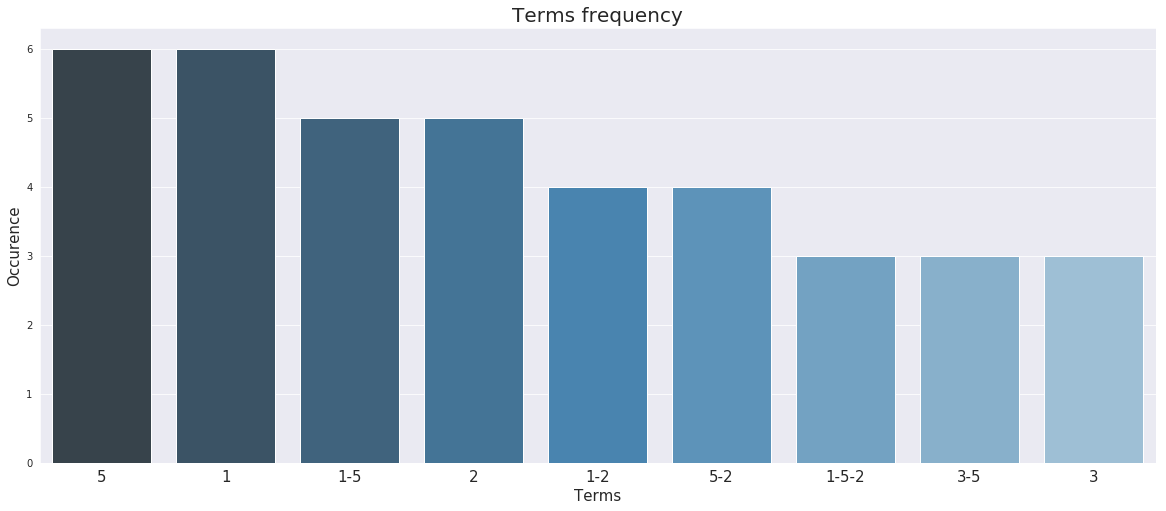

In [29]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x="index", y="value", data=data.reset_index() , palette="Blues_d"); 
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_ylabel(ax.get_ylabel(), fontsize=15)
ax.set_title('Terms frequency', fontsize=20)
ax.set_ylabel('Occurence', fontsize=15)
ax.set_xlabel('Terms', fontsize=15); 

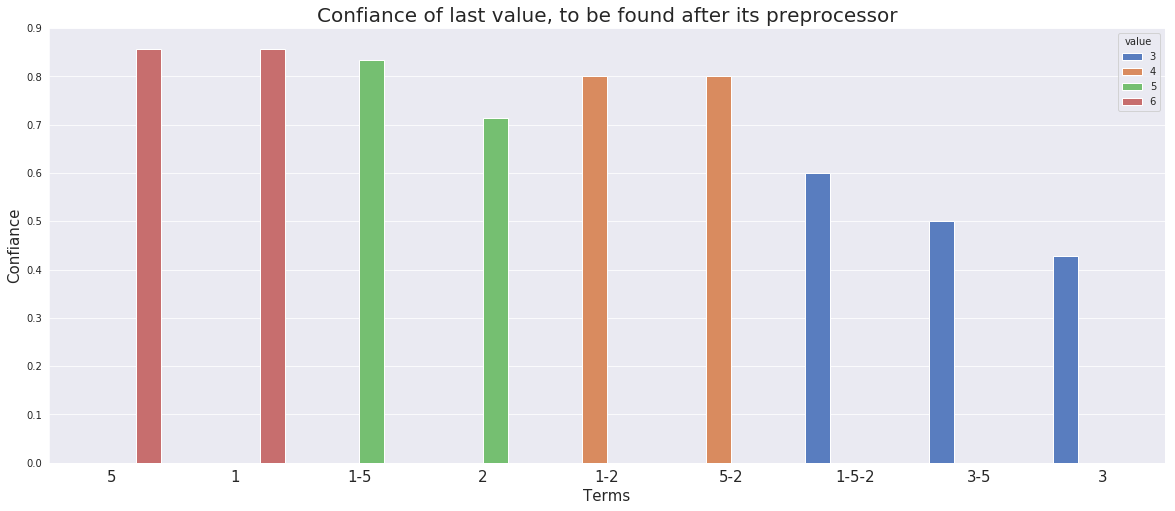

In [36]:
plt.figure(figsize=(20,8))
g = sns.barplot(x="index", y="confiance", hue="value", data=data.reset_index(), palette="muted")
g.set_xticklabels(ax.get_xticklabels(), fontsize=15)
plt.title('Confiance of last value, to be found after its preprocessor', fontsize=20)
g.set_ylabel('Confiance', fontsize=15)
g.set_xlabel('Terms', fontsize=15); 